In [1]:
pip install dtaidistance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.4 MB 24.3 MB/s 


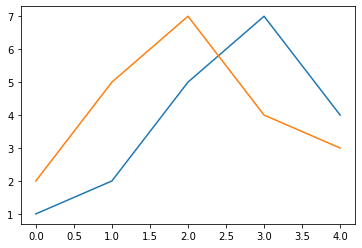

In [2]:
from dtaidistance import dtw
import matplotlib.pyplot as plt
a = [1, 2, 5, 7, 4]
c = [2, 5, 7, 4, 3]

plt.plot(a)
plt.plot(c)

In [3]:
from scipy.spatial import distance
print(distance.euclidean(a, c))

4.898979485566356


In [4]:
distance = dtw.distance(a, c)
print(distance)

1.4142135623730951


(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fecea0b2220>,
       dtype=object))

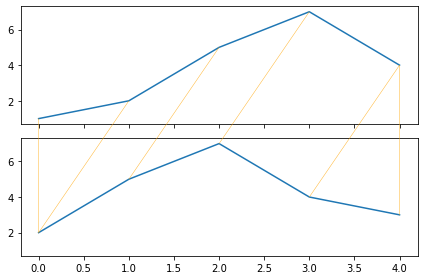

In [5]:
from dtaidistance import dtw_visualisation as dtwvis
dtwvis.plot_warping(a, c, path = dtw.warping_path(a, c))

In [6]:
pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 875 kB 16.7 MB/s 


In [40]:
import pandas as pd

from tslearn.generators import random_walks
X = random_walks(n_ts=2000, sz=13, d=1)

In [41]:
X

array([[[-1.29552248],
        [-0.6539964 ],
        [ 0.77674537],
        ...,
        [ 1.45097743],
        [ 3.11827484],
        [ 3.97042341]],

       [[ 2.64679566],
        [ 2.17977346],
        [ 3.44651716],
        ...,
        [ 2.41322228],
        [ 2.63481702],
        [ 2.9803222 ]],

       [[-1.85603958],
        [-1.6562219 ],
        [-0.18112689],
        ...,
        [ 1.10009182],
        [ 1.9899858 ],
        [ 3.12244582]],

       ...,

       [[-0.30496333],
        [ 0.33631896],
        [ 1.93578007],
        ...,
        [ 1.76548279],
        [ 4.14453735],
        [ 3.33708267]],

       [[-0.05156701],
        [-0.22947531],
        [-0.43950872],
        ...,
        [ 3.40035972],
        [ 3.88033843],
        [ 3.50579008]],

       [[-0.20086702],
        [-0.15056145],
        [-0.38448175],
        ...,
        [ 2.18346039],
        [ 1.12690054],
        [ 1.69727302]]])

In [42]:
X.shape

(2000, 13, 1)

In [43]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler


In [44]:
a = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(X)

In [45]:
a

array([[[-1.60760747],
        [-1.2051921 ],
        [-0.30771887],
        ...,
        [ 0.11521224],
        [ 1.16107168],
        [ 1.69560596]],

       [[ 0.69404261],
        [ 0.16575909],
        [ 1.59866704],
        ...,
        [ 0.42983041],
        [ 0.68049268],
        [ 1.07131927]],

       [[-1.37583663],
        [-1.22922352],
        [-0.14689555],
        ...,
        [ 0.79317871],
        [ 1.44612455],
        [ 2.27704944]],

       ...,

       [[-2.18405493],
        [-1.68176434],
        [-0.42897087],
        ...,
        [-0.56235787],
        [ 1.30105976],
        [ 0.66861302]],

       [[-0.8312254 ],
        [-0.93296362],
        [-1.05307283],
        ...,
        [ 1.14278524],
        [ 1.41726473],
        [ 1.20307639]],

       [[-1.00593158],
        [-0.95365197],
        [-1.19675152],
        ...,
        [ 1.47195905],
        [ 0.37393881],
        [ 0.96669324]]])

In [46]:
pd.DataFrame(a.squeeze(axis = 2))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.607607,-1.205192,-0.307719,-0.231903,-0.635546,-0.958761,-0.654997,0.322597,1.327252,0.979985,0.115212,1.161072,1.695606
1,0.694043,0.165759,1.598667,0.074725,-1.533487,-1.962840,-0.385176,-0.683837,0.732243,-0.881738,0.429830,0.680493,1.071319
2,-1.375837,-1.229224,-0.146896,-0.231887,-1.191999,-0.026652,-0.327388,-0.223827,0.183281,0.054077,0.793179,1.446125,2.277049
3,0.411104,0.808629,-0.855317,0.579853,0.175068,0.023214,-1.290508,-2.110270,-0.770929,0.034457,0.058369,1.310781,1.625549
4,2.602193,1.127135,-0.338072,-0.633566,-0.794360,-0.313544,-0.847418,-0.443386,-1.436826,0.810263,0.159803,-0.097923,0.205700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.664800,-0.914661,-1.139140,-1.006829,-0.250916,0.279186,-0.099899,0.903093,0.401415,-0.038134,0.429658,0.858182,2.242846
1996,0.986205,1.500889,-1.240358,0.018649,1.176238,0.553064,0.326522,-1.263441,-0.989587,-1.304354,-0.715572,1.249826,-0.298080
1997,-2.184055,-1.681764,-0.428971,-0.272255,-0.193988,1.013583,0.760892,0.706413,0.150484,0.722346,-0.562358,1.301060,0.668613
1998,-0.831225,-0.932964,-1.053073,-1.900099,-0.927090,0.023868,0.269562,0.239163,0.844435,0.504297,1.142785,1.417265,1.203076


In [13]:
from tslearn.clustering import TimeSeriesKMeans
modelT = TimeSeriesKMeans(n_clusters=6, metric="dtw",max_iter_barycenter=5, max_iter=150) 
modelT.fit_transform(a)

array([[2.84627043, 3.73980467, 3.84138397, 2.8465426 , 5.12559594,
        1.31435583],
       [2.7487421 , 1.44683941, 5.1702068 , 5.70735165, 2.83456919,
        4.09661134],
       [3.45213468, 5.72710146, 3.06667145, 1.86772154, 5.46694222,
        3.30984131],
       ...,
       [2.57177095, 2.20558528, 3.94412031, 4.3120679 , 3.32863037,
        1.49952726],
       [3.02864556, 1.24943671, 4.48573157, 6.03178557, 1.96593696,
        4.11011883],
       [2.75686213, 4.41481292, 2.65119203, 2.47942654, 4.15631086,
        2.26615883]])

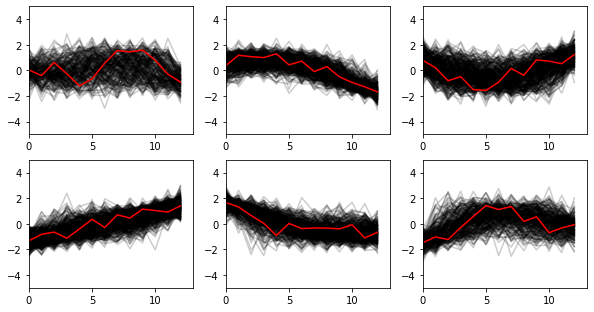

In [38]:
import matplotlib.pyplot as plt
sz = a.shape[1]


plt.figure(figsize=(10,8))
for yi in range(6):
    plt.subplot(3,3, yi + 1)
    for xx in range(len(modelT.labels_)):
        if modelT.labels_[xx] == yi:
                plt.plot(a.squeeze(axis = 2)[xx], "k-", alpha=0.2)
                
        plt.xlim(0, sz)
        plt.ylim(-5, 5)
    plt.plot(modelT.cluster_centers_[yi].ravel(), "r-")

In [27]:
modelT.labels_

array([5, 1, 3, ..., 5, 1, 5])

In [16]:
TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform([[1,2,3],[400,200,300]])

array([[[-1.22474487],
        [ 0.        ],
        [ 1.22474487]],

       [[ 1.22474487],
        [-1.22474487],
        [ 0.        ]]])